In [16]:
import pandas as pd
import os
from PCA import transform_pca

In [153]:
PATH = 'C:/Users/titou/Desktop/Centrale/Option OSY/Projet/Datasets'
mortality = pd.read_csv(os.path.join(PATH,"mortality_clean_aggregate.csv"))
wb = pd.read_csv(os.path.join(PATH,"WB_PCA.csv"))
fao = pd.read_csv(os.path.join(PATH,"FAO_PCA.csv"))

Adding temporal lag to wb and fao

In [154]:
lag = 5

In [155]:
wb['year'] = wb['year'] + lag
fao['year'] = fao['year'] + lag

Merging

In [156]:
data_output = pd.merge(mortality, wb, how = 'inner', on = ['area', 'year'])
data_output = pd.merge(data_output, fao, how = 'inner', on = ['area', 'year'])

Normalization of mortality

In [157]:
data_output['sum'] = data_output['sum']/data_output['SP.POP.TOTL']
pop = data_output['SP.POP.TOTL']
data_output = data_output.drop(columns = ['SP.POP.TOTL'])

Second PCA

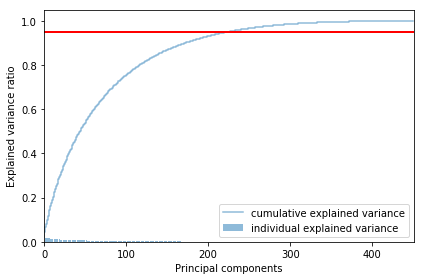

Number of components to keep to retain 90.0% of the variance: 172 out of the original 451
<class 'numpy.ndarray'>


In [158]:
type = data_output['type']
area = data_output['area']
year = data_output['year']
mort = data_output['sum']
data_output = data_output.drop(columns = ['type', 'area', 'year', 'sum'])
data_output = transform_pca(data_output)
data_output.insert(0, 'SP.POP.TOTL', pop)
data_output.insert(0, 'sum', mort)
data_output.insert(0, 'year', year)
data_output.insert(0, 'area', area)
data_output.insert(0, 'type', type)

In [159]:
data_output.to_csv(os.path.join(PATH,"ALL_PCA2_lag" + str(lag) + ".csv"), index = False)